In [1]:
!pip install tensorflow==2.0.0  

     |████████████████████████████████| 86.3MB 47kB/s 
     |████████████████████████████████| 450kB 50.6MB/s 
     |████████████████████████████████| 3.8MB 36.1MB/s 
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstalled tensorflow-1.15.0


In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals
#tensorflow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper Librraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.0.0


**Importing Fashion MNIST dataset**

In [0]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

**Loading the dataset returns four arrays**

In [0]:
class_names = ['T-shirt/Top','Trouser','Pullover','Dress','Coat','Sandle','Shirt','Sneaker','Bag','Ankle boot']


**Explore DataSet**

In [0]:
train_images.shape
len(train_labels)
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

**Exploring TestData Sets**

In [0]:
test_images.shape
len(test_labels)
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

**Preprocessing Data**
Pixel valuve must lie between 0 to 255


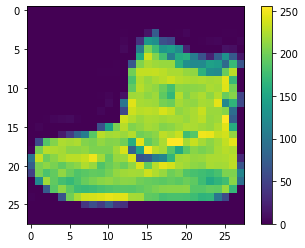

In [0]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

**Normalize** 
Divide each pixelValue by 255 to make them lie between 0 to 1

In [0]:
train_images = train_images / 255.0
test_images = test_images / 255.0

**Verify that data is in correct format**

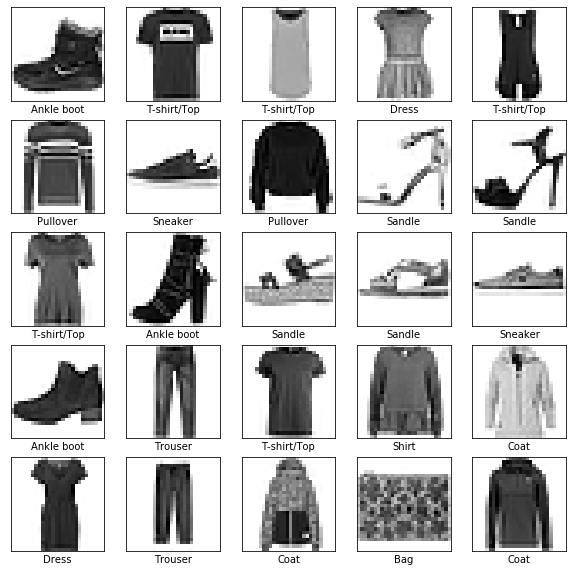

In [0]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

**Building the Model**

Setup the layers: 
Flatten the layes

In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

**Compile the Model:**

1.   **Loss Function**: This measure how the model is during training, we want to minimize this function to steer the model in right direction
2.   **Optimizer**: This is how the model is updated based on the data it sees and its loss function.
3.   **Metrics**: Used to monitor the training and testing steps, the following example uses fraction of images that are correcly classified.


In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

**Train The Model**

In [0]:
model.fit(train_images,train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 94us/sample - loss: 0.1421 - accuracy: 0.9459
Epoch 2/10
60000/60000 [==============================] - 5s 87us/sample - loss: 0.1374 - accuracy: 0.9486
Epoch 3/10
60000/60000 [==============================] - 5s 89us/sample - loss: 0.1350 - accuracy: 0.9495
Epoch 4/10
60000/60000 [==============================] - 5s 89us/sample - loss: 0.1332 - accuracy: 0.9494
Epoch 5/10
60000/60000 [==============================] - 6s 94us/sample - loss: 0.1309 - accuracy: 0.9503
Epoch 6/10
60000/60000 [==============================] - 5s 87us/sample - loss: 0.1266 - accuracy: 0.9526
Epoch 7/10
60000/60000 [==============================] - 5s 91us/sample - loss: 0.1246 - accuracy: 0.9527
Epoch 8/10
60000/60000 [==============================] - 5s 88us/sample - loss: 0.1231 - accuracy: 0.9535
Epoch 9/10
60000/60000 [==============================] - 5s 88us/sample - loss: 0.1218 - accuracy: 0.9542
Epoch 10/10
60

**Evaluate Accuracy**

In [0]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('\n Test Loss and Accuracy:', test_loss, test_acc )

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

**Predictions**

In [0]:
predictions = model.predict(test_images)

In [0]:
predictions[0]

array([6.3465650e-22, 6.2286059e-23, 2.3869506e-21, 2.6137881e-25,
       3.9922524e-22, 5.6794525e-14, 4.1162801e-21, 2.1579567e-06,
       2.7457881e-16, 9.9999785e-01], dtype=float32)

Predictions are array of probabilities correspondings to each labels. The above array shows max probability corresponding to label-9. Now, in order to get the predicted label use "numpy.argmax()".

In [0]:
np.argmax(predictions[0])

9

In [0]:
test_labels[0]

9

We can plot a graph to look at full set of 10 class predictions

In [0]:
def plot_image(i, preditcions_array, true_label, img):
  preditcions_array, true_label, img = preditcions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(preditcions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color= 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                       100*np.max(preditcions_array),
                                       class_names[true_label]),
                                       color=color)
  
def plot_value_array(i, preditcions_array, true_label):
  preditcions_array, true_label = preditcions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), preditcions_array, color="#777777")
  plt.ylim([0,1])
  predicted_label = np.argmax(preditcions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

Let's look at 0th image predictions and prediction array

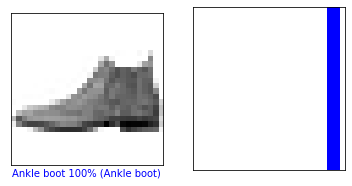

In [0]:
i = 0 
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

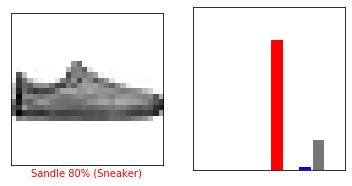

In [0]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

Let's plot several images and their predictions

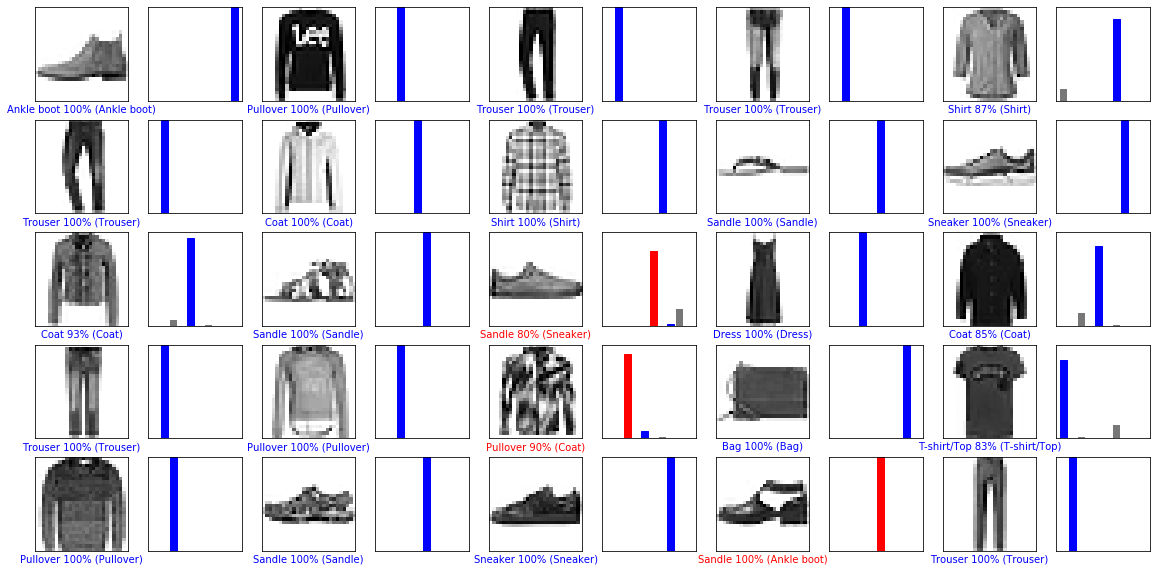

In [0]:
num_rows = 5
num_cols = 5
num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

Test for a single image

In [0]:
img = test_images[0]
img = (np.expand_dims(img, 0))
print(img.shape)

(1, 28, 28)


Now predict for a single image

In [0]:
predictions_single = model.predict(img)
print(predictions_single)

[[6.3465892e-22 6.2286059e-23 2.3869324e-21 2.6137982e-25 3.9922524e-22
  5.6794308e-14 4.1162959e-21 2.1579547e-06 2.7457671e-16 9.9999785e-01]]


In [0]:
np.argmax(predictions_single[0])

9

9

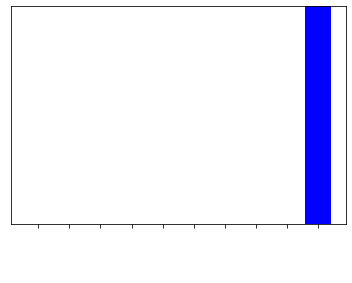

In [0]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, color='white', rotation=45)

np.argmax(predictions_single[0])